In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
galaxymeta = pd.read_csv("../galaxy_metadata.txt", sep = "\t")
vcf_samples = pd.read_csv("../vcf_samples.txt", header = None)
galaxymeta = galaxymeta[galaxymeta["Affymetrix ID"].isin(vcf_samples[0].tolist())][galaxymeta["Genetic Coral Species Call"] == "A.palmata"]

/tmp/ipykernel_3402094/3436701132.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  galaxymeta = galaxymeta[galaxymeta["Affymetrix ID"].isin(vcf_samples[0].tolist())][galaxymeta["Genetic Coral Species Call"] == "A.palmata"]


In [76]:
(galaxymeta[["Affymetrix ID"]]
 [galaxymeta["Region"] != "State College"].set_index("Affymetrix ID")
 .to_csv("../popgen/snpchip_samples.txt", header = None))

In [3]:
dupsnps = pd.read_csv("../popgen/snps.txt", header = None)

In [4]:
dupsnps = dupsnps[~dupsnps[0].str.contains(";")]

In [5]:
snplist = pd.read_csv("../41598_2020_69101_MOESM1_ESM.csv")

In [6]:
snplist = snplist[snplist["Probe Set ID"].isin(dupsnps[0].tolist())].reset_index(drop=True)

In [7]:
snplist = (snplist.sort_values(["Affy SNP ID", "Probe Set ID"], 
                     ascending = [True, True]).drop_duplicates("Affy SNP ID", keep = "last"))

In [82]:
(snplist[["Probe Set ID"]].set_index("Probe Set ID")
 .to_csv("../popgen/filtered_snps.txt", header = None))

In [18]:
%%bash
source ~/.bashrc
conda activate bcftools_call
cd ../popgen
bcftools view /storage/group/ibb3/default/convert_snpchip_coords/all_genotyped_samples_including_parents.vcf \
    -S snpchip_samples.txt \
    --include ID==@filtered_snps.txt \
    -O v > snpchip_popgen.vcf

In [19]:
%%bash
source ~/.bashrc
conda activate ipyrad
cd ../popgen
plink2 --vcf snpchip_popgen.vcf --king-cutoff 0.022 \
    --allow-extra-chr --out snpchip_popgen

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
PLINK v2.00a2.3LM 64-bit Intel (24 Jan 2020)   www.cog-genomics.org/plink/2.0/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to snpchip_popgen.log.
Options in effect:
  --allow-extra-chr
  --king-cutoff 0.022
  --out snpchip_popgen
  --vcf snpchip_popgen.vcf

Start time: Sun Dec 24 16:16:33 2023
128814 MiB RAM detected; reserving 64407 MiB for main workspace.
Using up to 24 threads (change this with --threads).
--vcf: 32123 variants scanned.
--vcf: snpchip_popgen-temporary.pgen + snpchip_popgen-temporary.pvar +
snpchip_popgen-temporary.psam written.
1127 samples (0 females, 0 males, 1127 ambiguous; 1127 founders) loaded from
snpchip_popgen-temporary.psam.
32123 variants loaded from snpchip_popgen-temporary.pvar.
Note: No phenotype data present.
--kin

In [124]:
%%bash
source ~/.bashrc
conda activate ipyrad
cd ../popgen
plink2 --vcf snpchip_popgen.vcf --king-cutoff 0.0625 \
    --allow-extra-chr --out snpchip_popgen_for_iliana

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
PLINK v2.00a2.3LM 64-bit Intel (24 Jan 2020)   www.cog-genomics.org/plink/2.0/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to snpchip_popgen_for_iliana.log.
Options in effect:
  --allow-extra-chr
  --king-cutoff 0.0625
  --out snpchip_popgen_for_iliana
  --vcf snpchip_popgen.vcf

Start time: Thu Jan  4 14:45:36 2024
128814 MiB RAM detected; reserving 64407 MiB for main workspace.
Using up to 24 threads (change this with --threads).
--vcf: 32123 variants scanned.
--vcf: snpchip_popgen_for_iliana-temporary.pgen +
snpchip_popgen_for_iliana-temporary.pvar +
snpchip_popgen_for_iliana-temporary.psam written.
1127 samples (0 females, 0 males, 1127 ambiguous; 1127 founders) loaded from
snpchip_popgen_for_iliana-temporary.psam.
32123 variants loaded from sn

In [63]:
nonclonal = pd.read_csv('../popgen/snpchip_popgen.king.cutoff.in.id')

In [157]:
nonclonal = pd.read_csv('../popgen/snpchip_popgen_for_iliana.king.cutoff.in.id')

In [20]:
galaxymeta = pd.read_csv("../galaxy_metadata.txt", sep = "\t")
vcf_samples = pd.read_csv("../vcf_samples.txt", header = None)
galaxymeta = galaxymeta[galaxymeta["Affymetrix ID"].isin(vcf_samples[0].tolist())][galaxymeta["Genetic Coral Species Call"] == "A.palmata"]
galaxymeta = galaxymeta[galaxymeta["Affymetrix ID"].isin(nonclonal["#IID"].tolist())].reset_index(drop=True)
galaxymeta = galaxymeta[~galaxymeta["User Specimen ID"].str.contains("SWSA")].reset_index(drop=True)
florida = galaxymeta[galaxymeta["Region"].isin(["Florida"])].sample(40)
puertorico = galaxymeta[galaxymeta["Region"].isin(["Puerto Rico"])].sample(40)
galaxymeta = galaxymeta[~galaxymeta["Region"].isin(["Florida", "Puerto Rico"])]
galaxymeta = pd.concat([florida, puertorico, galaxymeta]).reset_index(drop=True)
(galaxymeta[["Affymetrix ID"]].set_index("Affymetrix ID")
 .to_csv("../popgen/filtered_final_snpchip_samples.txt", header = None))

/tmp/ipykernel_1647818/3436701132.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  galaxymeta = galaxymeta[galaxymeta["Affymetrix ID"].isin(vcf_samples[0].tolist())][galaxymeta["Genetic Coral Species Call"] == "A.palmata"]


In [111]:
(galaxymeta.set_index("Affymetrix ID")
 .to_csv("../popgen/full_galaxy_meta_filtered.csv"))

In [158]:
galaxymeta = pd.read_csv("../galaxy_metadata.txt", sep = "\t")
vcf_samples = pd.read_csv("../vcf_samples.txt", header = None)
galaxymeta = galaxymeta[~galaxymeta["Affymetrix ID"].str.contains("a100000")].reset_index(drop=True)
galaxymeta = galaxymeta[galaxymeta["Affymetrix ID"].isin(vcf_samples[0].tolist())][galaxymeta["Genetic Coral Species Call"] == "A.palmata"]
galaxymeta = galaxymeta[galaxymeta["Affymetrix ID"].isin(nonclonal["#IID"].tolist())].reset_index(drop=True)
galaxymeta = galaxymeta[~galaxymeta["User Specimen ID"].str.contains("SWSA")].reset_index(drop=True)
florida = galaxymeta[galaxymeta["Region"].isin(["Florida"])].sample(60)
puertorico = galaxymeta[galaxymeta["Region"].isin(["Puerto Rico"])].sample(60)
galaxymeta = galaxymeta[~galaxymeta["Region"].isin(["Florida", "Puerto Rico"])]
galaxymeta = pd.concat([florida, puertorico, galaxymeta]).reset_index(drop=True)
galaxymeta = galaxymeta[galaxymeta["Region"].isin(["Florida", "Puerto Rico", "Belize", "Curacao", "Colombia", "USVI"])]
(galaxymeta[["Affymetrix ID"]].set_index("Affymetrix ID")
 .to_csv("../popgen/foriliana.txt", header = None))

/tmp/ipykernel_1647818/933799374.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  galaxymeta = galaxymeta[galaxymeta["Affymetrix ID"].isin(vcf_samples[0].tolist())][galaxymeta["Genetic Coral Species Call"] == "A.palmata"]


In [112]:
%%bash
source ~/.bashrc
conda activate bcftools_call
cd ../popgen
bcftools view /storage/group/ibb3/default/convert_snpchip_coords/all_genotyped_samples_including_parents.vcf \
    -S filtered_final_snpchip_samples.txt \
    --include ID==@filtered_snps.txt \
    | bcftools view -q 0.05:minor -i 'F_MISSING==0' \
    -m2 -M2 -v snps \
    -O v > snpchip_popgen_final.vcf

In [162]:
%%bash
source ~/.bashrc
conda activate bcftools_call
cd ../popgen
bcftools view /storage/group/ibb3/default/convert_snpchip_coords/all_genotyped_samples_including_parents.vcf \
    -S ../popgen/foriliana.txt \
    --include ID==@filtered_snps.txt \
    | bcftools view -q 0.05:minor -i 'F_MISSING==0' \
    -m2 -M2 -v snps \
    -O v > snpchip_popgen_final_for_iliana.vcf

In [113]:
%%bash
source ~/.bashrc
conda activate bcftools_call
cd ../popgen
bcftools +prune -m 0.2 -w 10000 \
    snpchip_popgen_final.vcf -Ov -o snpchip_popgen_final_ld.vcf

In [163]:
%%bash
source ~/.bashrc
conda activate bcftools_call
cd ../popgen
bcftools +prune -m 0.2 -w 10000 \
    snpchip_popgen_final_for_iliana.vcf -Ov -o snpchip_popgen_final_ld_for_iliana.vcf

In [164]:
%%bash
source ~/.bashrc
conda activate ipyrad
cd ../popgen
plink2 --vcf snpchip_popgen_final_ld_for_iliana.vcf --pca \
    --allow-extra-chr --out snpchip_popgen_pca_for_iliana

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
PLINK v2.00a2.3LM 64-bit Intel (24 Jan 2020)   www.cog-genomics.org/plink/2.0/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to snpchip_popgen_pca_for_iliana.log.
Options in effect:
  --allow-extra-chr
  --out snpchip_popgen_pca_for_iliana
  --pca
  --vcf snpchip_popgen_final_ld_for_iliana.vcf

Start time: Thu Jan  4 14:51:56 2024
128814 MiB RAM detected; reserving 64407 MiB for main workspace.
Using up to 24 threads (change this with --threads).
--vcf: 1677 variants scanned.
--vcf: snpchip_popgen_pca_for_iliana-temporary.pgen +
snpchip_popgen_pca_for_iliana-temporary.pvar +
snpchip_popgen_pca_for_iliana-temporary.psam written.
233 samples (0 females, 0 males, 233 ambiguous; 233 founders) loaded from
snpchip_popgen_pca_for_iliana-temporary.psam.
1677

In [114]:
%%bash
source ~/.bashrc
conda activate ipyrad
cd ../popgen
plink2 --vcf snpchip_popgen_final_ld.vcf --pca \
    --allow-extra-chr --out snpchip_popgen_pca

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
PLINK v2.00a2.3LM 64-bit Intel (24 Jan 2020)   www.cog-genomics.org/plink/2.0/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to snpchip_popgen_pca.log.
Options in effect:
  --allow-extra-chr
  --out snpchip_popgen_pca
  --pca
  --vcf snpchip_popgen_final_ld.vcf

Start time: Sun Dec 24 17:42:11 2023
128814 MiB RAM detected; reserving 64407 MiB for main workspace.
Using up to 24 threads (change this with --threads).
--vcf: 1840 variants scanned.
--vcf: snpchip_popgen_pca-temporary.pgen + snpchip_popgen_pca-temporary.pvar +
snpchip_popgen_pca-temporary.psam written.
262 samples (0 females, 0 males, 262 ambiguous; 262 founders) loaded from
snpchip_popgen_pca-temporary.psam.
1840 variants loaded from snpchip_popgen_pca-temporary.pvar.
Note: No phenotype d

In [4]:
galaxymeta = pd.read_csv("../galaxy_metadata.txt", sep = "\t")
vcf_samples = pd.read_csv("../vcf_samples.txt", header = None)
galaxymeta = galaxymeta[galaxymeta["Affymetrix ID"].isin(vcf_samples[0].tolist())][galaxymeta["Genetic Coral Species Call"] == "A.palmata"]

/tmp/ipykernel_3402094/3436701132.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  galaxymeta = galaxymeta[galaxymeta["Affymetrix ID"].isin(vcf_samples[0].tolist())][galaxymeta["Genetic Coral Species Call"] == "A.palmata"]


In [5]:
eigen = pd.read_csv("../popgen/snpchip_popgen_pca.eigenvec", sep = "\t")

In [6]:
eigenvar = pd.read_csv("../popgen/snpchip_popgen_pca.eigenval", sep = "\t", header = None)

In [165]:
eigen = pd.read_csv("../popgen/snpchip_popgen_pca_for_iliana.eigenvec", sep = "\t")

In [166]:
eigenvar = pd.read_csv("../popgen/snpchip_popgen_pca_for_iliana.eigenval", sep = "\t", header = None)

In [7]:
meta = galaxymeta[["Affymetrix ID", "Region"]]
meta.columns = ["#IID", "Region"]

In [8]:
eigen = eigen.merge(meta, on = "#IID", how = "left")

In [3]:
import umap

/storage/group/ibb3/default/.conda/envs/masters/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
X=eigen[eigen.columns[1:11]].values
 
#######################################################################
# Reducting the data in 2 components using UMAP
UMAP_Object=umap.UMAP(n_neighbors=20, min_dist=0.5, n_components=2)
ComponentValues=UMAP_Object.fit_transform(X)
 
#Creating the dataframe
ReducedData=pd.DataFrame(data=ComponentValues, columns=['Comp1','Comp2'])

In [9]:
ReducedData = pd.concat([ReducedData, eigen[["Region"]]], axis = 1)

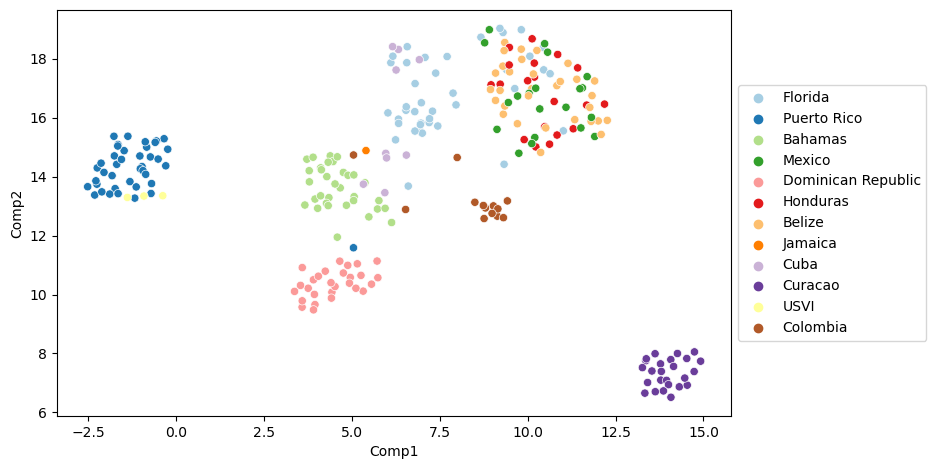

In [89]:
sns.scatterplot(data = ReducedData, x = "Comp1", y = "Comp2", hue = "Region", palette = "Paired")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [9]:
import seaborn as sns
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 8.7,5.27


Text(0, 0.5, 'PC2 (8.07824%)')

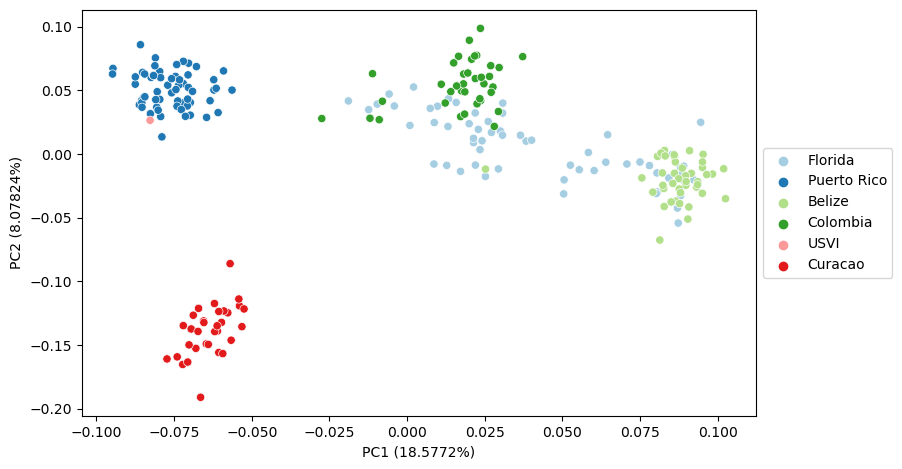

In [169]:
sns.scatterplot(data = eigen, x = "PC1", y = "PC3", hue = "Region", palette = 'Paired')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("PC1 (" + str(eigenvar[0][0]) + "%)")
plt.ylabel("PC2 (" + str(eigenvar[0][1]) + "%)")
#plt.savefig("../SNPchip_popgen.png", dpi = 300, bbox_inches='tight')

In [ ]:
[~galaxymeta["Affymetrix ID"].str.contains("a100000")]

In [156]:
galaxymeta[galaxymeta["Affymetrix ID"].isin(eigen["#IID"][eigen["PC2"] > 0.1])]

,Affymetrix ID,Sample ID,User Specimen ID,Field Call,Sample Depth,Percent Missing Data Coral,Percent Heterozygous Coral,Percent Acerv Coral,Percent Apalm Coral,Bcoral Genet Id,...,Mortality,Healing Time,Sequencing Facility,Array Version,Plate Barcode,Collector Last Name,First Name,Organization,Email,Collection Date
6,a100000-4368120-060520-256_G05.CEL,A10127,5524,palmata,-9.0000,0.13,0,0.3,99.7,P2118,...,-9,-9,PSU_genomics_core,None,None,Miller,Margaret,NOAA,m.miller@secore.org,8/1/2005
59,a100000-4368120-060520-256_O05.CEL,A10122,6895,palmata,-9.0000,0.07,0,0.3,99.7,P1003,...,-9,-9,PSU_genomics_core,None,None,Miller,Margaret,NOAA,m.miller@secore.org,9/17/2009
282,a100000-4368120-060520-256_A17.CEL,A10116,13907,palmata,3.6576,0.07,0,0.3,99.7,P2212,...,-9,-9,PSU_genomics_core,None,None,Fogarty,Nikki,NOVA Southeastern,fogartyn@uncw.edu,2/3/2016
283,a100000-4368120-060520-256_C17.CEL,A10101,13911,palmata,2.7432,0.13,0,0.3,99.7,P1232,...,-9,-9,PSU_genomics_core,None,None,Fogarty,Nikki,NOVA Southeastern,fogartyn@uncw.edu,2/3/2016
284,a100000-4368120-060520-256_C19.CEL,A10107,14468,palmata,-9.0000,0.06,0.64,0.3,99.06,None,...,-9,-9,Admera_Health,None,None,Baums,Iliana,Penn State,ibb3@psu.edu,3/6/2017
285,a100000-4368120-060520-256_E19.CEL,A10123,14469,palmata,-9.0000,0.06,1.15,0.29,98.57,None,...,-9,-9,Admera_Health,None,None,Baums,Iliana,Penn State,ibb3@psu.edu,3/6/2017
286,a100000-4368120-060520-256_G03.CEL,A10121,3070,palmata,-9.0000,1.75,0.72,0.3,97.29,P1208,...,-9,-9,PSU_genomics_core,None,None,Baums,Iliana,Penn State,ibb3@psu.edu,12/16/2002
287,a100000-4368120-060520-256_G07.CEL,A10120,13702,palmata,1.8288,0.12,0,0.3,99.7,P2957,...,-9,-9,PSU_genomics_core,None,None,Baums,Iliana,Penn State,ibb3@psu.edu,10/27/2015
288,a100000-4368120-060520-256_G09.CEL,A10110,13740,palmata,1.8288,0.07,0,0.3,99.7,P2952,...,-9,-9,PSU_genomics_core,None,None,Baums,Iliana,Penn State,ibb3@psu.edu,10/30/2015
289,a100000-4368120-060520-256_I03.CEL,A10112,3071,palmata,-9.0000,0.11,0.62,0.3,99.07,P1209,...,-9,-9,PSU_genomics_core,None,None,Baums,Iliana,Penn State,ibb3@psu.edu,12/16/2002


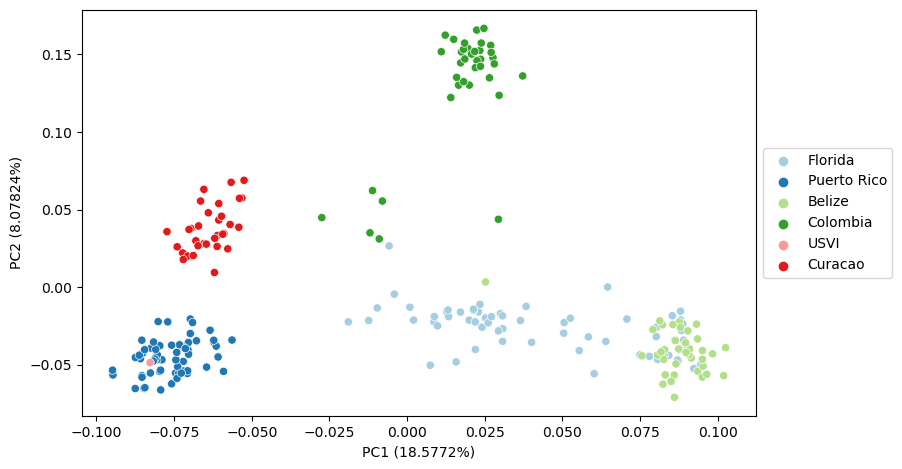

In [171]:
sns.scatterplot(data = eigen, x = "PC1", y = "PC2", hue = "Region", palette = 'Paired')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("PC1 (" + str(eigenvar[0][0]) + "%)")
plt.ylabel("PC2 (" + str(eigenvar[0][1]) + "%)")
plt.savefig("../only_CU_CO_FL_USVI_PR_BE_SNPchip_popgen.png", dpi = 300, bbox_inches='tight')

Text(0, 0.5, 'PC3 (4.40648%)')

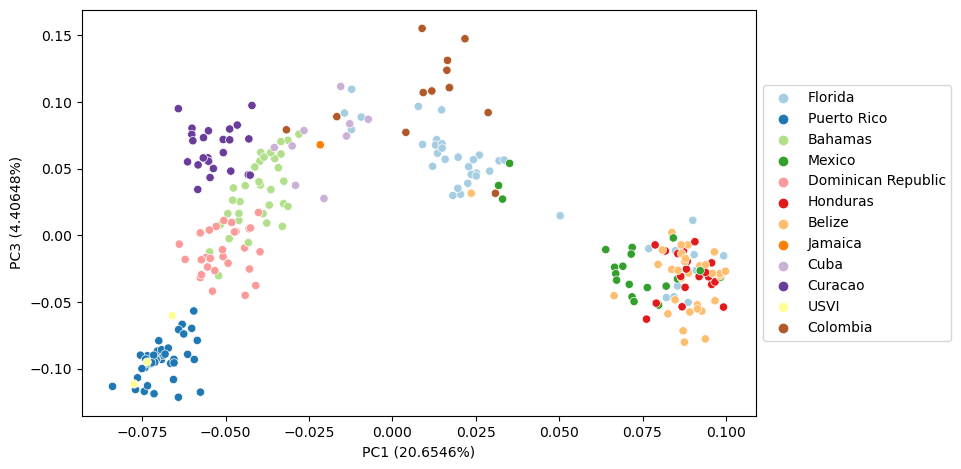

In [13]:
sns.scatterplot(data = eigen, x = "PC1", y = "PC3", hue = "Region", palette = 'Paired')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("PC1 (" + str(eigenvar[0][0]) + "%)")
plt.ylabel("PC3 (" + str(eigenvar[0][2]) + "%)")
#plt.savefig("../SNPchip_popgen.png", dpi = 300, bbox_inches='tight')

Text(0, 0.5, 'PC3 (4.40648%)')

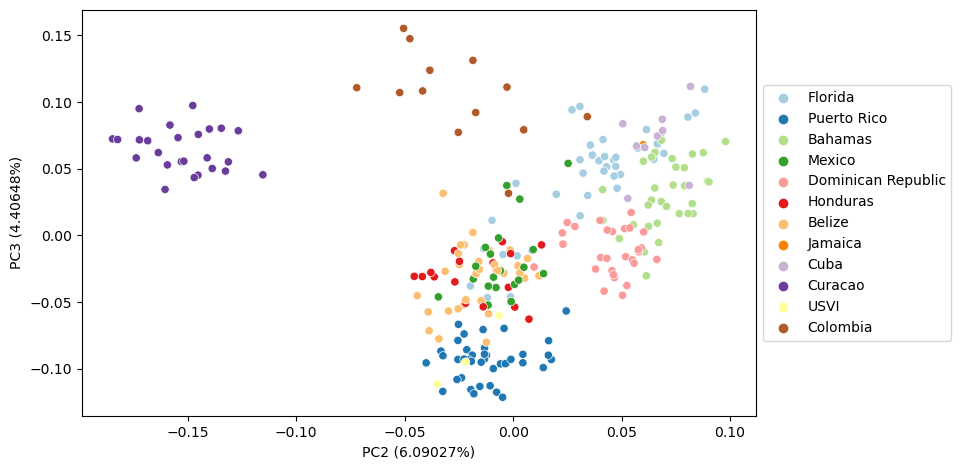

In [14]:
sns.scatterplot(data = eigen, x = "PC2", y = "PC3", hue = "Region", palette = 'Paired')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("PC2 (" + str(eigenvar[0][1]) + "%)")
plt.ylabel("PC3 (" + str(eigenvar[0][2]) + "%)")
#plt.savefig("../SNPchip_popgen.png", dpi = 300, bbox_inches='tight')

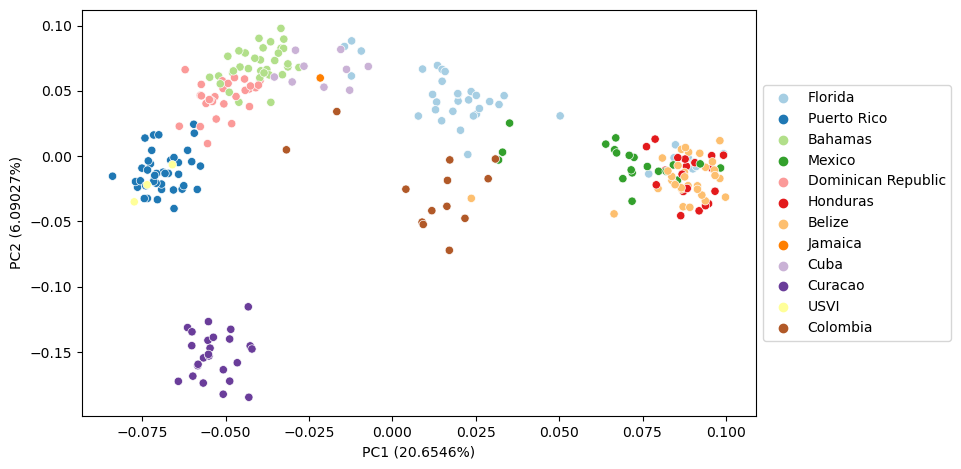

In [12]:
sns.scatterplot(data = eigen, x = "PC1", y = "PC2", hue = "Region", palette = 'Paired')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("PC1 (" + str(eigenvar[0][0]) + "%)")
plt.ylabel("PC2 (" + str(eigenvar[0][1]) + "%)")
plt.savefig("../SNPchip_popgen.png", dpi = 300, bbox_inches='tight')

In [2]:
nonrelate = pd.read_csv("keep_ids.txt")

In [3]:
fl = pd.read_csv("../FL.txt", header = None)
cu = pd.read_csv("../CU.txt", header = None)

In [4]:
fl = fl[fl[0].isin(nonrelate["#IID"].tolist())].reset_index(drop=True)

In [6]:
fl.set_index(0).to_csv("../FL_nonclonal.txt", header = None, mode='a')

In [119]:
fl = fl.sample(10).reset_index(drop=True)

In [120]:
cu = cu[cu[0].isin(nonrelate["#IID"].tolist())][~cu[0].str.contains("^SRR")][cu[0] != "A131"].reset_index(drop=True)
cu = cu.sample(10).reset_index(drop=True)

/tmp/ipykernel_1091702/2866923376.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cu = cu[cu[0].isin(nonrelate["#IID"].tolist())][~cu[0].str.contains("^SRR")][cu[0] != "A131"].reset_index(drop=True)


In [123]:
%%bash
cat ../BE.txt ../MX.txt ../VI.txt ../DR.txt ../JM.txt > ../popgen_samples.txt

In [143]:
%%bash
cat ../FL.txt ../CU.txt ../BE.txt ../MX.txt ../VI.txt ../DR.txt ../JM.txt > ../popgen_full_samples.txt

In [124]:
cu.set_index(0).to_csv("../popgen_samples.txt", header = None, mode='a')
fl.set_index(0).to_csv("../popgen_samples.txt", header = None, mode='a')

In [28]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel.vcf.gz \
    --minGQ 20 --minQ 20 --recode-INFO-all \
    --min-alleles 2 --max-alleles 2 --thin 10000 \
    --maf 0.05 --remove-indels --max-missing 1.0 --min-meanDP 5 \
    --max-meanDP 53 --keep keep_ids.txt \
    --exclude-bed ../references/repeats_and_cnv_sorted_merged.bed \
    --recode --out ../calls/popgen_full_filtered

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel.vcf.gz
	--keep keep_ids.txt
	--recode-INFO-all
	--maf 0.05
	--max-alleles 2
	--max-meanDP 53
	--min-alleles 2
	--minGQ 20
	--thin 10000
	--min-meanDP 5
	--minQ 20
	--max-missing 1
	--out ../calls/popgen_full_filtered
	--recode
	--remove-indels
	--exclude-bed ../references/repeats_and_cnv_sorted_merged.bed

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
After filtering, kept 143 out of 176 Individuals
Outputting VCF file...
	Read 218633 BED file entries.
After filtering, kept 17085 out of a possible 9737242 Sites
Run Time = 1684.00 seconds


In [7]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel_FL_illumina_filtered_whatshap.vcf.gz \
    --minGQ 20 --minQ 20 --recode-INFO-all \
    --maf 0.05 --max-missing 0.8 --keep ../FL_nonclonal.txt \
    --exclude-bed ../references/repeats.sorted.bed \
    --recode --out ../calls/popgen_filtered

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel_FL_illumina_filtered_whatshap.vcf.gz
	--keep ../FL_nonclonal.txt
	--recode-INFO-all
	--maf 0.05
	--minGQ 20
	--minQ 20
	--max-missing 0.8
	--out ../calls/popgen_filtered
	--recode
	--exclude-bed ../references/repeats.sorted.bed

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
After filtering, kept 97 out of 106 Individuals
Outputting VCF file...
	Read 267644 BED file entries.
After filtering, kept 1839262 out of a possible 8081396 Sites
Run Time = 2407.00 seconds


In [ ]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel.vcf.gz \
    --minGQ 20 --minQ 20 --recode-INFO-all \
    --min-alleles 2 --max-alleles 2 --thin 10000 \
    --maf 0.05 --remove-indels --max-missing 1.0 --min-meanDP 5 \
    --max-meanDP 53 --keep ../popgen_samples.txt \
    --exclude-bed ../references/repeats_and_cnv_sorted_merged.bed \
    --recode --out ../calls/popgen_filtered

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel.vcf.gz
	--keep ../popgen_samples.txt
	--recode-INFO-all
	--maf 0.05
	--max-alleles 2
	--max-meanDP 53
	--min-alleles 2
	--minGQ 20
	--thin 10000
	--min-meanDP 5
	--minQ 20
	--max-missing 1
	--out ../calls/popgen_filtered
	--recode
	--remove-indels
	--exclude-bed ../references/repeats_and_cnv_sorted_merged.bed

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
After filtering, kept 45 out of 176 Individuals
Outputting VCF file...
	Read 218633 BED file entries.


In [ ]:
%%bash
source ~/.bashrc
conda activate bcftools_call
bgzip ../calls/popgen_filtered.recode.vcf
tabix ../calls/popgen_filtered.recode.vcf.gz
bcftools +tag2tag ../calls/popgen_filtered.recode.vcf.gz -- --pl-to-gl \
    | bcftools view -O v > ../calls/popgen_filtered.vcf

In [45]:
%%bash
source ~/.bashrc
conda activate bcftools_call
rm ../calls/popgen_full_filtered.recode.vcf.gz
rm ../calls/popgen_full_filtered.recode.vcf.gz.tbi
bgzip ../calls/popgen_full_filtered.recode.vcf
tabix ../calls/popgen_full_filtered.recode.vcf.gz
bcftools +tag2tag ../calls/popgen_full_filtered.recode.vcf.gz -- --pl-to-gl \
    | bcftools view -O v > ../calls/popgen_full_filtered.vcf

In [ ]:
%%bash
source ~/.bashrc
conda activate ipyrad
mkdir -p ../popgen
for i in $( bioawk -c fastx '{ print $name, length($seq) }' < ../references/apal_and_sym.fa | sort -rhk2,2 | head -14 | cut -f1 ); do
    vcftools --vcf ../calls/popgen_filtered.vcf \
        --out ../popgen/ngsadmix_in_${i} --BEAGLE-GL \
        --chr ${i}
done

In [46]:
%%bash
source ~/.bashrc
conda activate ipyrad
mkdir -p ../popgen
for i in $( bioawk -c fastx '{ print $name, length($seq) }' < ../references/apal_and_sym.fa | sort -rhk2,2 | head -14 | cut -f1 ); do
    vcftools --vcf ../calls/popgen_full_filtered.vcf \
        --out ../popgen/ngsadmix_in_full_${i} --BEAGLE-GL \
        --chr ${i}
done

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ../calls/popgen_full_filtered.vcf
	--chr Apal_hic_scaffold_4
	--max-alleles 2
	--min-alleles 2
	--BEAGLE-GL
	--out ../popgen/ngsadmix_in_full_Apal_hic_scaffold_4

After filtering, kept 143 out of 143 Individuals
Outputting GLs in BEAGLE Genotype Likelihood format (bi-allelic SNPs with GL tags only)
After filtering, kept 1680 out of a possible 17085 Sites
Run Time = 2.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ../calls/popgen_full_filtered.vcf
	--chr Apal_hic_scaffold_10
	--max-alleles 2
	--min-alleles 2
	--BEAGLE-GL
	--out ../popgen/ngsadmix_in_full_Apal_hic_scaffold_10

After filtering, kept 143 out of 143 Individuals
Outputting GLs in BEAGLE Genotype Likelihood format (bi-allelic SNPs with GL tags only)
After filtering, kept 1548 out of a possible 17085 Sites
Run Time = 1.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthon


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ../calls/popgen_full_filtered.vcf
	--chr Apal_hic_scaffold_15
	--max-alleles 2
	--min-alleles 2
	--BEAGLE-GL
	--out ../popgen/ngsadmix_in_full_Apal_hic_scaffold_15

After filtering, kept 143 out of 143 Individuals
Outputting GLs in BEAGLE Genotype Likelihood format (bi-allelic SNPs with GL tags only)
After filtering, kept 1117 out of a possible 17085 Sites
Run Time = 1.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ../calls/popgen_full_filtered.vcf
	--chr Apal_hic_scaffold_6
	--max-alleles 2
	--min-alleles 2
	--BEAGLE-GL
	--out ../popgen/ngsadmix_in_full_Apal_hic_scaffold_6

After filtering, kept 143 out of 143 Individuals
Outputting GLs in BEAGLE Genotype Likelihood format (bi-allelic SNPs with GL tags only)
After filtering, kept 969 out of a possible 17085 Sites
Run Time = 1.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony

In [ ]:
%%bash
source ~/.bashrc
conda activate ipyrad
head -1 ../popgen/ngsadmix_in_Apal_hic_scaffold_1.BEAGLE.GL > ../popgen/ngsadmix_in.BEAGLE.GL
for i in $( bioawk -c fastx '{ print $name, length($seq) }' < ../references/apal_and_sym.fa | sort -rhk2,2 | head -14 | cut -f1 ); do
    tail -n+2 ../popgen/ngsadmix_in_${i}.BEAGLE.GL >> ../popgen/ngsadmix_in.BEAGLE.GL
done
gzip ../popgen/ngsadmix_in.BEAGLE.GL

In [47]:
%%bash
source ~/.bashrc
conda activate ipyrad
rm ../popgen/ngsadmix_in_full.BEAGLE.GL.gz
head -1 ../popgen/ngsadmix_in_full_Apal_hic_scaffold_1.BEAGLE.GL > ../popgen/ngsadmix_in_full.BEAGLE.GL
for i in $( bioawk -c fastx '{ print $name, length($seq) }' < ../references/apal_and_sym.fa | sort -rhk2,2 | head -14 | cut -f1 ); do
    tail -n+2 ../popgen/ngsadmix_in_full_${i}.BEAGLE.GL >> ../popgen/ngsadmix_in_full.BEAGLE.GL
done
gzip ../popgen/ngsadmix_in_full.BEAGLE.GL

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [ ]:
%%bash
source ~/.bashrc
conda activate bcftools_call
bcftools query -l ../calls/popgen_filtered.vcf \
    > pop.names

In [48]:
%%bash
source ~/.bashrc
conda activate bcftools_call
bcftools query -l ../calls/popgen_full_filtered.vcf \
    > pop_full.names

In [ ]:
%%bash
source ~/.bashrc
conda activate pcangsd
cd ../popgen
pcangsd -b ngsadmix_in.BEAGLE.GL.gz -t 8 --admix -o popgen

In [49]:
%%bash
source ~/.bashrc
conda activate pcangsd
cd ../popgen
pcangsd -b ngsadmix_in_full.BEAGLE.GL.gz -t 8 --admix -o popgen_full

PCAngsd v.1.10.
Jonas Meisner and Anders Albrechtsen.
Using 8 thread(s).

Parsing Beagle file.
Loaded 16223 sites and 143 individuals.
Estimating minor allele frequencies.
Number of sites after MAF filtering (0.05): 16199

Estimating covariance matrix.
Using 2 principal components (MAP test).
Individual allele frequencies estimated (1).
Individual allele frequencies estimated (2). RMSE=0.1187491277298764
Individual allele frequencies estimated (3). RMSE=0.1184476019997404
Individual allele frequencies estimated (4). RMSE=0.0025024470396094764
Individual allele frequencies estimated (5). RMSE=0.0058248172608954775
Individual allele frequencies estimated (6). RMSE=0.005375707741537827
Individual allele frequencies estimated (7). RMSE=0.12185382338090334
Individual allele frequencies estimated (8). RMSE=0.12269129540985162
Individual allele frequencies estimated (9). RMSE=0.03538790844497484
Individual allele frequencies estimated (10). RMSE=0.0035999937224628956
Individual allele frequen

CSG-MU (17). RMSE=7.430258095189839e-05
CSG-MU (18). RMSE=5.757920905687075e-05
CSG-MU (19). RMSE=4.181777595615885e-05
CSG-MU (20). RMSE=3.1815293006322526e-05
CSG-MU (21). RMSE=2.59341300899462e-05
CSG-MU (22). RMSE=2.0731411545575774e-05
CSG-MU (23). RMSE=1.6524912438315794e-05
CSG-MU (24). RMSE=1.168940772956336e-05
CSG-MU (25). RMSE=1.0039056382765898e-05
CSG-MU (26). RMSE=8.421070013328281e-06
Converged.
Frobenius error: 7.9548593
Log-likelihood: nan
Saved admixture proportions as popgen_full.admix.3.Q (Text)
Saved ancestral allele frequencies proportions as popgen_full.admix.3.F.npy (Binary)



In [50]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
covmatrix = np.genfromtxt("../popgen/popgen.cov")

In [69]:
covmatrix = np.genfromtxt("../popgen/popgen_full.cov")

In [4]:
sampnames = pd.read_csv("pop.names", sep = "\s", names = ["Sample"])

/tmp/ipykernel_531680/1309595675.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  sampnames = pd.read_csv("pop.names", sep = "\s", names = ["Sample"])


In [70]:
sampnames = pd.read_csv("pop_full.names", sep = "\s", names = ["Sample"])

/tmp/ipykernel_531680/2283128076.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  sampnames = pd.read_csv("pop_full.names", sep = "\s", names = ["Sample"])


In [149]:
metadata = pd.read_csv("../popmap.txt", sep = "\t", names = ["Sample", "Region"])

In [150]:
w, v = LA.eig(covmatrix)
perc_var = w / w.sum()
v = pd.DataFrame(v)
v = pd.concat([sampnames, v], axis = 1).merge(metadata, how = "left", on = "Sample")

In [151]:
metadata = pd.read_csv("../filtered_DARPA_metadata.csv")

In [152]:
metadata["Sample"] = metadata["Novogene_ID"]

In [153]:
v = v.merge(metadata[["Sample", "Nursery", "CBASS_DATE", "CBASS_POS"]], on = "Sample", how = 'left')

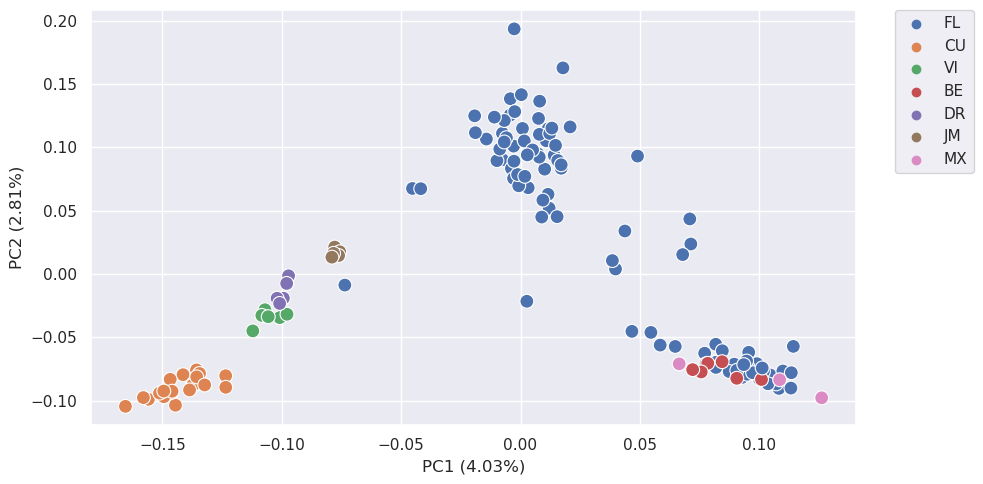

In [84]:
plt.figure()
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = v, x = 0, y = 1, hue = "Region", s=100)
plt.xlabel("PC1 (" + str(round(perc_var[0]*100, 2)) + "%)")
plt.ylabel("PC2 (" + str(round(perc_var[1]*100, 2)) + "%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()

In [154]:
v = v[["Sample", "Nursery", "CBASS_DATE", "CBASS_POS", 0, 1]]

In [155]:
v.columns = ["#IID", "Nursery", "CBASS_DATE", "CBASS_POS", "PC1", "PC2"]
v = v[["#IID", "Nursery", "CBASS_DATE", "CBASS_POS", "PC1", "PC2"]]

In [156]:
v = v.fillna("NA")

In [157]:
v["CBASS_DATE"] = "JUNE_" + v["CBASS_DATE"]

In [158]:
v = v[["#IID", "CBASS_DATE", "CBASS_POS", "PC1", "PC2"]]

In [159]:
v.set_index("#IID").to_csv("../covar.cov", sep = "\t")

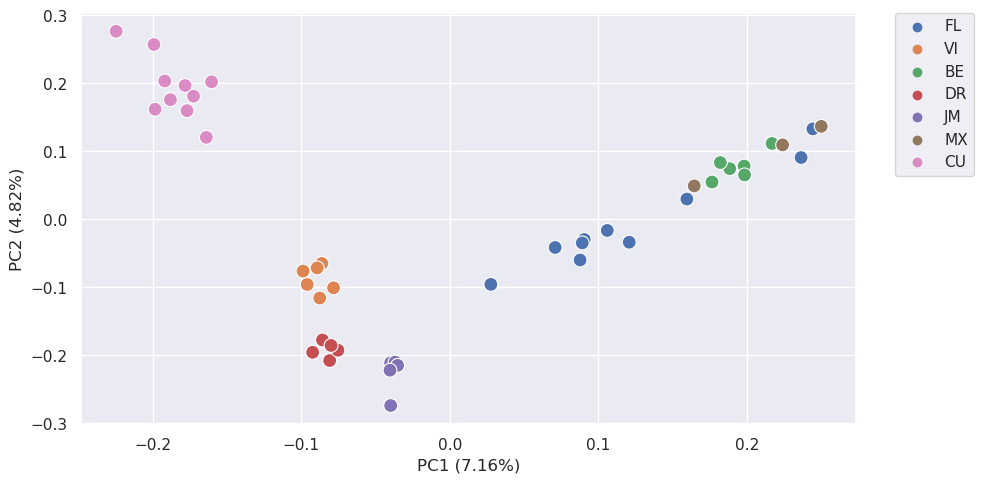

In [143]:
plt.figure()
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data = v, x = 0, y = 1, hue = "Region", s=100)
plt.xlabel("PC1 (" + str(round(perc_var[0]*100, 2)) + "%)")
plt.ylabel("PC2 (" + str(round(perc_var[1]*100, 2)) + "%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()